In [1]:
import sys
sys.path.append('../')
import latexStrings as ls
import numpy as np
import matplotlib.pyplot as plt
from math import *
from IPython.display import Latex
import odesolver

# Ejercicio 5

Consideremos el PVI (\ref{eq:1}), cuya solucion (\ref{eq:2}) ha sido justificada previamente. Utilizemos los métodos:
\begin{itemize}
    \item Euler Explícito
    \item Trapecio Explícito
    \item Punto Medio Explícito 
    \item RK4 
\end{itemize}
Con pasos $h\in\{1/50,1/100,1/200\}$ para calcular y comparar el error global en t=1

In [2]:
EG=[[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
f = lambda t, y : y+2*np.exp(-t)
exact = lambda t, t0, y0 : np.exp(t)*(y0*np.exp(-t0)+np.exp(-2*t0)-np.exp(-2*t))
I = (0, 1)
y0 = 1
y1 = exact(1,0,1)
TEE, WEE = odesolver.solve(f,y0,I,50,method="Explicit Euler")
EG[0][0] = abs(WEE[0,50]-y1)
TEE1, WEE1 = odesolver.solve(f,y0,I,100,method="Explicit Euler")
EG[0][1] = abs(WEE1[0,100]-y1)
TEE2, WEE2 = odesolver.solve(f,y0,I,200,method="Explicit Euler")
EG[0][2] = abs(WEE2[0,200]-y1)

In [3]:
TTE, WTE = odesolver.solve(f,y0,I,50,method="Explicit Trapezoid")
EG[1][0]= abs(WTE[0,50]-y1)
TTE1, WTE1 = odesolver.solve(f,y0,I,100,method="Explicit Trapezoid")
EG[1][1] = abs(WTE1[0,100]-y1)
TTE2, WTE2 = odesolver.solve(f,y0,I,200,method="Explicit Trapezoid")
EG[1][2] = abs(WTE2[0,200]-y1)

In [4]:
TPE, WPE = odesolver.solve(f,y0,I,50,method="Explicit Midpoint")
EG[2][0]= abs(WPE[0,50]-y1)
TPE1, WPE1 = odesolver.solve(f,y0,I,100,method="Explicit Midpoint")
EG[2][1] = abs(WPE1[0,100]-y1)
TPE2, WPE2 = odesolver.solve(f,y0,I,200,method="Explicit Midpoint")
EG[2][2] = abs(WPE2[0,200]-y1)

In [5]:
TRK, WRK = odesolver.solve(f,y0,I,50,method="RK4")
EG[3][0]= abs(WRK[0,50]-y1)
TRK1, WRK1 = odesolver.solve(f,y0,I,100,method="RK4")
EG[3][1] = abs(WRK1[0,100]-y1)
TRK2, WRK2 = odesolver.solve(f,y0,I,200,method="RK4")
EG[3][2]= abs(WRK2[0,200]-y1)

In [6]:
Latex(ls.latexList(EG[0], 'E_{ExpEul}', form = '%s'))

<IPython.core.display.Latex object>

In [7]:
Latex(ls.latexList(EG[1], 'E_{ExpTra}', form = '%s'))

<IPython.core.display.Latex object>

In [8]:
Latex(ls.latexList(EG[2], 'E_{ExpMP}', form = '%s'))

<IPython.core.display.Latex object>

In [9]:
Latex(ls.latexList(EG[3], 'E_{RK4}', form = '%s'))

<IPython.core.display.Latex object>

In [14]:
steps = [1/50,1/100,1/200]
header = ['Paso', 'Euler Explicito', 'Trapecio Explicito', 'Punto Medio Implicito', 'Runge-Kutta 4']
data = np.array([steps, EG[0], EG[1], EG[2], EG[3]]).T
Latex(ls.latexTable(header, data, '{c|r r r r}'))

<IPython.core.display.Latex object>

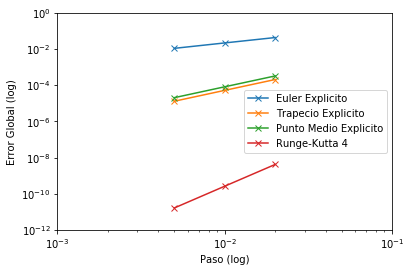

In [10]:
plt.plot(steps, EG[0], marker = 'x', label = 'Euler Explicito')
plt.plot(steps, EG[1], marker = 'x', label = 'Trapecio Explicito')
plt.plot(steps, EG[2], marker = 'x', label = 'Punto Medio Explicito')
plt.plot(steps, EG[3], marker = 'x', label = 'Runge-Kutta 4')
plt.xscale('log')
plt.xlabel('Paso (log)')
plt.yscale('log')
plt.ylabel('Error Global (log)')
plt.axis([1e-3,1e-1,1e-12,1])
plt.legend()
plt.show()

En la tabla podemos notar los Errores Globales en t=1 de cada método coinciden con los órdenes que vimos teóricamente ($O(h)$ para Euler, $O(h^2)$ para Trapecio y Punto Medio y $O(h^4)$ para RK4). También podemos notar que a pesar de tener el mismo orden, el método del trapecio fué más preciso que el método del punto medio para esta ODE. 

La gráfica de nuevo confirma esto, pues vemos que la pendiente aproxiamda de las rectas de los errores coinside con sus errores teoricos.